In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('/content/drive/MyDrive/ML_PROJECT/assests/scaled_voice_data.csv')
x = df.drop('gender', axis=1)
y = df['gender']

In [7]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,kurt,sp.ent,sfm,mode,meanfun,minfun,modindx,gender
0,0.602758,0.355976,1.055699,-0.142117,1.567427,1.027768,-0.210519,-0.540272,-0.835728,1.318746,-0.357016,0.582726,-1.266497,male
1,0.642158,0.219537,0.936464,1.053742,0.626879,-0.852602,-0.204561,0.214854,0.510834,0.914485,0.223601,-1.088261,0.743066,female
2,-0.495719,-0.169618,-0.309233,0.445927,-1.448345,-1.307654,-0.139015,-0.257852,0.191444,0.056141,0.986513,-1.022684,0.238451,female
3,-0.708439,0.021716,-0.541947,0.177739,-1.431259,-0.993061,-0.154961,0.057054,0.131876,-2.141210,0.675466,-0.643929,2.324912,female
4,1.763427,-1.871090,1.387941,1.710837,0.914199,-1.441506,-0.130894,-2.543075,-1.691409,0.917164,1.851877,0.805841,-0.133960,female


In [8]:
for i in range(4,13,2):
    pca = PCA(n_components=i)
    pca.fit(x)
    pca_df = pca.transform(x)

    L = []

    for k in range(1, len(pca_df[0])+1):
        L.append("PCA"+str(k))
    pca_df = pd.DataFrame(pca_df, columns=L)

    X_trainpca, X_testpca , Y_trainpca, Y_testpca = train_test_split(pca_df, y, test_size=0.2, random_state=20)

    lr_pca = LogisticRegression(penalty='l2', max_iter=500)
    lr_pca.fit(X_trainpca, Y_trainpca)
    y_pca_pred =lr_pca.predict(X_testpca)

    print()
    print("Number of Components: " + str(i))
    print(f"GaussianNB with PCA variance {i/100}%")
    print("Accuracy with PCA", metrics.accuracy_score(Y_testpca, y_pca_pred))
    print("Precision with PCA", metrics.precision_score(Y_testpca, y_pca_pred, average = 'macro'))
    print("Recall with PCA", metrics.recall_score(Y_testpca, y_pca_pred, average = 'macro'))
    print("F1 score with PCA", metrics.f1_score(Y_testpca, y_pca_pred, average = 'macro') )


Number of Components: 4
GaussianNB with PCA variance 0.04%
Accuracy with PCA 0.8564668769716088
Precision with PCA 0.8616463665665888
Recall with PCA 0.8590111642743221
F1 score with PCA 0.8563636046775065

Number of Components: 6
GaussianNB with PCA variance 0.06%
Accuracy with PCA 0.9684542586750788
Precision with PCA 0.9682495418691738
Recall with PCA 0.9686602870813397
F1 score with PCA 0.9684162282799298

Number of Components: 8
GaussianNB with PCA variance 0.08%
Accuracy with PCA 0.9684542586750788
Precision with PCA 0.9683066315957277
Recall with PCA 0.968530701754386
F1 score with PCA 0.9684089889879914

Number of Components: 10
GaussianNB with PCA variance 0.1%
Accuracy with PCA 0.9668769716088328
Precision with PCA 0.9667696447256964
Recall with PCA 0.9668859649122807
F1 score with PCA 0.9668253885197007

Number of Components: 12
GaussianNB with PCA variance 0.12%
Accuracy with PCA 0.9716088328075709
Precision with PCA 0.971561004784689
Recall with PCA 0.971561004784689
F1 s

### PCA for 10 components

In [9]:
pca = decomposition.PCA(n_components=10)
pc = pca.fit_transform(x)
pc_columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8', 'PC9', 'PC10']
pc_df = pd.DataFrame(data = pc , columns = pc_columns)
pc_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1.352215,2.328407,0.999782,0.359089,-0.442943,-0.533456,0.373166,-0.918544,0.186755,-0.260826
1,1.075413,0.606051,-0.731035,-1.200156,0.859642,0.902422,0.733628,0.857947,-0.000475,-0.454370
2,0.105855,-1.989240,-0.462104,-0.837605,-0.362397,0.964364,0.610193,0.320570,0.174695,-0.252602
3,-1.143655,-2.681782,-1.355154,-0.000889,1.648948,0.845451,-0.824447,0.258825,0.406446,0.090126
4,5.128654,-0.879598,0.579787,0.547515,0.452750,0.495591,0.081369,-0.412883,-0.113951,-0.228564


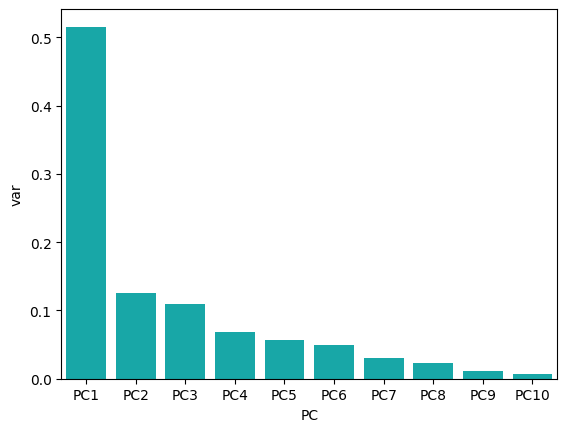

In [10]:
pcdf = pd.DataFrame({'var':pca.explained_variance_ratio_,'PC':pc_columns})
sns.barplot(x='PC',y="var", data=pcdf, color="c");